In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplot
%matplotlib inline

In [3]:
df=pd.read_csv("q1.csv",names=["x1","x2","y"])

col=list(df.columns)
for c in col[:-1]:
    cmin=df[c].min()
    cmax=df[c].max()
    
    df[c]=df[c].apply(lambda x:(x-cmin)/(cmax-cmin))

df.head(2)

,x1,x2,y
0,0.065428,0.694655,0
1,0.003266,0.194705,0


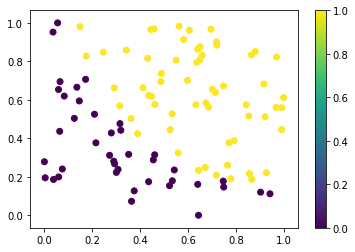

In [4]:
mplot.scatter(df.iloc[:,0],df.iloc[:,1],c=df.iloc[:,2])
mplot.colorbar()

In [5]:
df.insert(0,"x0",np.ones(len(df)))

In [6]:
df.head()

,x0,x1,x2,y
0,1.0,0.065428,0.694655,0
1,1.0,0.003266,0.194705,0
2,1.0,0.082968,0.619618,0
3,1.0,0.431764,0.816001,1
4,1.0,0.701943,0.655392,1


In [7]:
xd=df.values[:,:-1]
yd=df.values[:,-1:]

index=np.arange(len(xd))
np.random.shuffle(index)
xd=xd[index]
yd=yd[index]

tod_do=0.7
xtrain,ytrain=xd[:int(len(xd)*tod_do),:],yd[:int(len(yd)*tod_do)]
xtest,ytest=xd[int(len(xd)*tod_do):,:],yd[int(len(yd)*tod_do):]
inp=3
out=1
lamb=100
lr=0.01

xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((70, 3), (70, 1), (30, 3), (30, 1))

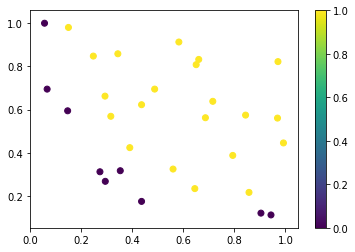

In [8]:
mplot.scatter(xtest[:,1],xtest[:,2],c=ytest[:,0])
mplot.colorbar()

In [9]:
w=np.random.randn(inp,out)
w.shape,w

((3, 1), array([[ 0.07530019],
        [-0.8043854 ],
        [-0.80615597]]))

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def forward(x,wt):
    y=np.matmul(x,wt)
    return y
def loss(y,y_):
    l = -(y*np.log(y_) + (1-y)*np.log(1-y_))
    return l.mean()
def gradients(dw,x):
    g = dw*x
    return g.mean()

In [11]:
earr=[]
larr=[]
for epoch in range(10000):
    
    output=forward(xtrain,w)
    output=sigmoid(output)
    dw=(output-ytrain)
    
    earr.append(epoch)
    larr.append(loss(ytrain,output))
    
    
    for i in range(len(w)):
        grad=gradients(dw,xtrain[:,i:i+1])
        w[i] = w[i] - lr*grad
        
print(w)

[[-2.74416392]
 [ 3.55212973]
 [ 2.74318177]]


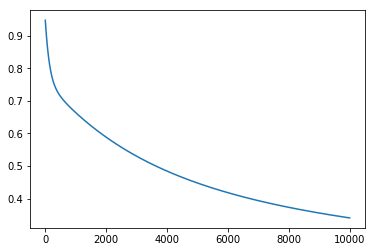

In [12]:
mplot.plot(earr,larr)

In [13]:
pred=np.ravel(sigmoid(forward(xtest,w)))
pred=np.array([round(p) for p in pred])
pred.shape,ytest.shape
acc=np.mean(np.equal(pred,ytest.flatten()))
print("accuracy : {}".format(acc*100))

accuracy : 83.33333333333334


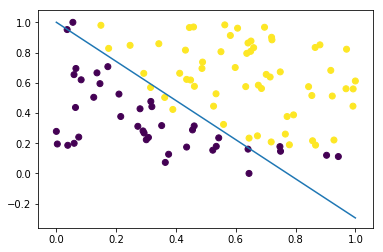

In [39]:
xpoints=np.linspace(0,1,1000)
def caly(x):
    wt=w.flatten()
    skip = ((-wt[0]/wt[2])) - ((wt[1]/wt[2])*(x))
    return skip
mplot.scatter(df.x1,df.x2,c=df.y)
mplot.plot(xpoints,caly(xpoints))